Update: apply Normalized Difference Vegetation Index to distinguish building and vegetations with relative difference between R and G pixels

In [1]:
import numpy as np
# read in image data as n-dimension array
import os
imgdir = '../dataset'
imgfile1 = os.path.join(imgdir, 'k02-05m-cropped.png')
imgfile2 = os.path.join(imgdir, 'k12-05m-cropped.png')
from skimage import io
img1 = io.imread(imgfile1)
img2 = io.imread(imgfile2)

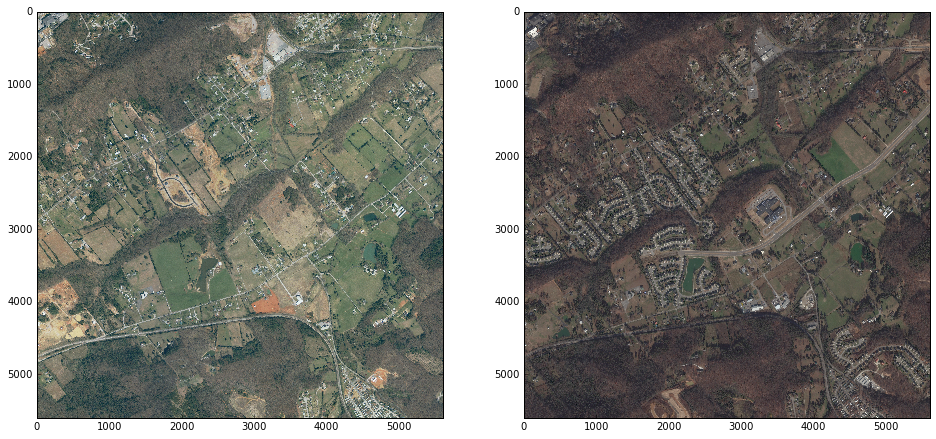

In [2]:
# show data
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(16,35))
plt.subplot(121).imshow(img1)
plt.subplot(122).imshow(img2)

In [3]:
# divide image arrays into grids based on preset step size
# @param: 2D RGB image as ndarray
# @param: grid_step_size should be divisible to image size
# @return: list of lists of divided ndarray (image grids)
def divide_image_into_grids(image, grid_step_size=50):
    assert image.shape[0]%grid_step==0
    assert image.shape[1]%grid_step==0
    image_grids = list()
    grid_rows = image.shape[0]/grid_step # number of grids along rows
    grid_cols = image.shape[1]/grid_step # number of grids along columns
    for r in range(grid_rows):
        row_image_grids = list()
        for c in range(grid_cols):
            tmp = image[r*grid_step:(r+1)*grid_step-1, c*grid_step:(c+1)*grid_step-1, :]
            row_image_grids.append(tmp)
        image_grids.append(row_image_grids)
    return image_grids

In [4]:
# paraemeter setting to divide image into square grids
grid_step = 280 # unit in pixel, should be divisible to the image size
image_grids_1 = divide_image_into_grids(img1, grid_step)
image_grids_2 = divide_image_into_grids(img2, grid_step)

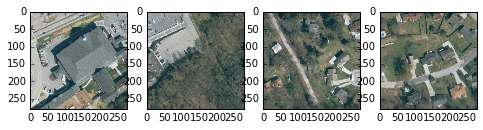

In [5]:
# plot example grids
fig = plt.figure(figsize=(8,20))
plt.subplot(141).imshow(image_grids_1[0][0])
plt.subplot(142).imshow(image_grids_1[0][1])
plt.subplot(143).imshow(image_grids_1[0][2])
plt.subplot(144).imshow(image_grids_1[0][3])

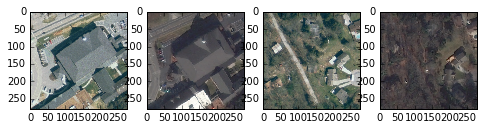

In [6]:
# plot example grids
fig = plt.figure(figsize=(8,20))
plt.subplot(141).imshow(image_grids_1[0][0])
plt.subplot(142).imshow(image_grids_2[0][0])
plt.subplot(143).imshow(image_grids_1[0][2])
plt.subplot(144).imshow(image_grids_2[0][2])

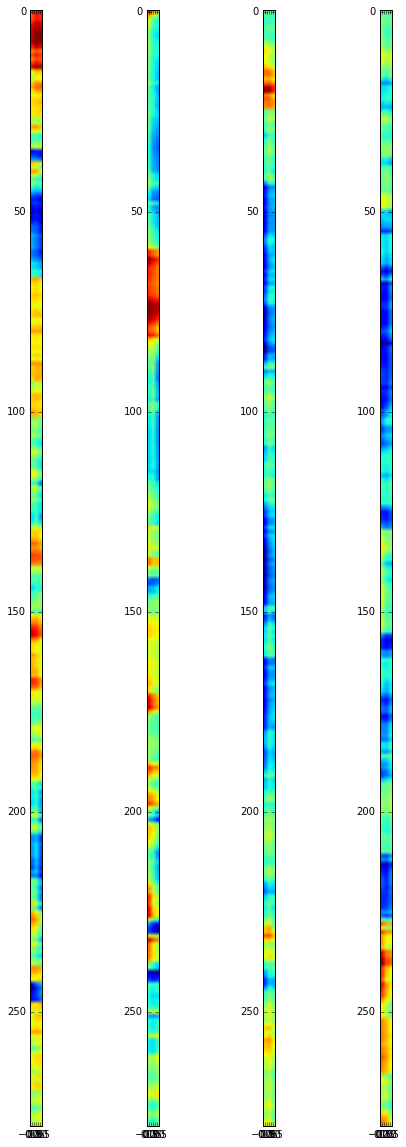

In [7]:
# plot single color channel
fig = plt.figure(figsize=(8,20))
plt.subplot(141).imshow(image_grids_1[0][0][0]) # R
plt.subplot(142).imshow(image_grids_2[0][0][0])
plt.subplot(143).imshow(image_grids_1[0][2][1]) # G
plt.subplot(144).imshow(image_grids_2[0][2][1])